In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

### Simple linear regression

In [2]:
x = [2,3,5,6,8,3,9,3,2,90]
y = [9,2,90,65,27,28,15,3,5,19]

In [3]:
slope, intercept, r, p, std_error = stats.linregress(x,y)

In [4]:
def slop(x):
    return slope*x+intercept

In [5]:
mymodel = list(map(slop,x))

In [6]:
mymodel

[26.999184893356883,
 26.93619526332473,
 26.81021600326043,
 26.747226373228276,
 26.621247113163975,
 26.93619526332473,
 26.558257483131822,
 26.93619526332473,
 26.999184893356883,
 21.456097450527555]

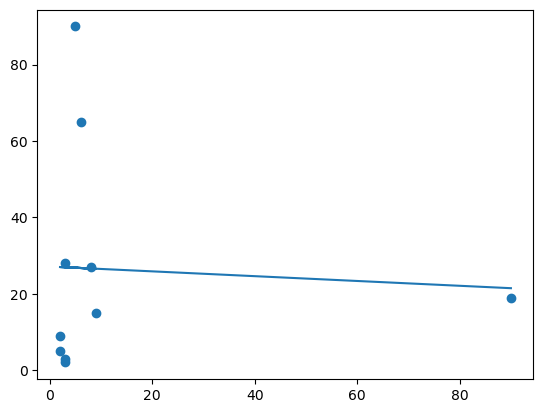

In [7]:
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()

In [8]:
r

-0.0587093771853234

In [9]:
std_error

0.37867517676263246

In [10]:
p

0.8720149829096124

In [11]:
slop(57)

23.534755241588552

In [12]:
from pydataset import data

In [13]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


#### Cake dataset

In [14]:
cake_data = data('cake')
cake_data.head()

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215


In [15]:
x= cake_data.temperature.values

In [16]:
len(x)

270

In [17]:
y = cake_data.angle.values

In [18]:
len(y)

270

In [19]:
slope,intercept,r,p,std_error = stats.linregress(x,y)

In [22]:
def slop(x):
    return slope*x+intercept

In [23]:
my_model = list(map(slop,x))

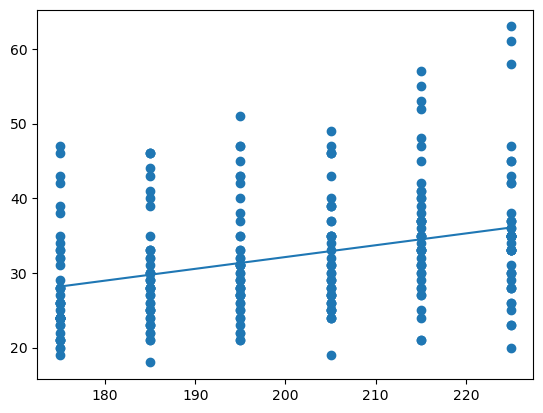

In [26]:
plt.scatter(x,y)
plt.plot(x,my_model)
plt.show()

In [27]:
r

0.3292421798325423

In [28]:
p

3.0224496605433415e-08

### Polynomial Regression

In [34]:
x = [2,3,45,43,6,7,234,7,3,55,356,33,75]
y = [456,65,35,677,33,699,332,67,89,33,99,22,676]

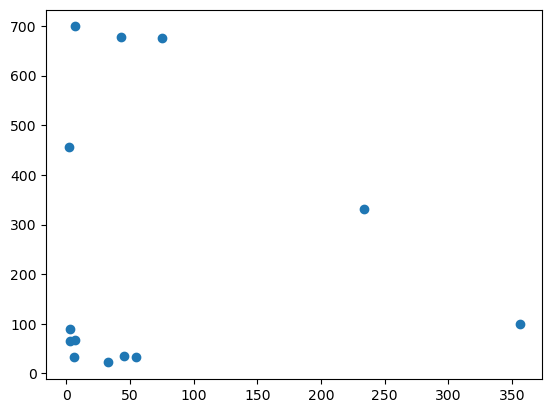

In [35]:
plt.scatter(x,y)
plt.show()

In [36]:
my_model = np.poly1d(np.polyfit(x,y,3))

In [37]:
my_line = np.linspace(1,370,100)

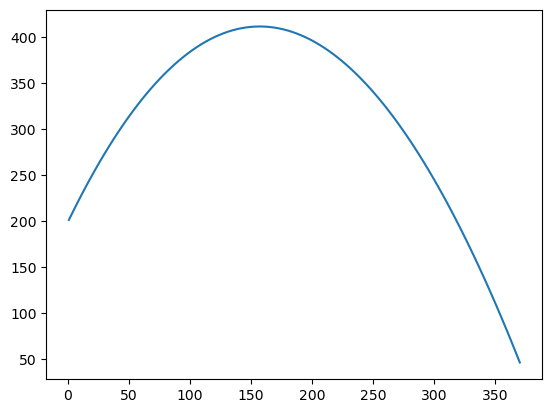

In [38]:
plt.plot(my_line,my_model(my_line))
plt.show()

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y,my_model(x))

0.07494084780352228

In [43]:
 my_model(206.77)

391.1986056596057

### Multiple Regression

In [45]:
data = pd.read_csv('./cars.csv')
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [49]:

x = data.iloc[:,2:-1].values

In [50]:
y = data.iloc[:,-1].values

In [51]:
x

array([[1000,  790],
       [1200, 1160],
       [1000,  929],
       [ 900,  865],
       [1500, 1140],
       [1000,  929],
       [1400, 1109],
       [1500, 1365],
       [1500, 1112],
       [1600, 1150],
       [1100,  980],
       [1300,  990],
       [1000, 1112],
       [1600, 1252],
       [1600, 1326],
       [1600, 1330],
       [1600, 1365],
       [2200, 1280],
       [1600, 1119],
       [2000, 1328],
       [1600, 1584],
       [2000, 1428],
       [2100, 1365],
       [1600, 1415],
       [2000, 1415],
       [1500, 1465],
       [2000, 1490],
       [2000, 1725],
       [1600, 1523],
       [2000, 1705],
       [2100, 1605],
       [2000, 1746],
       [1600, 1235],
       [1600, 1390],
       [1600, 1405],
       [2500, 1395]], dtype=int64)

In [52]:
y

array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120], dtype=int64)

### MLR using statsmodels

In [53]:
import statsmodels.api as sm

In [54]:
x_stat = sm.add_constant(x)
x_stat

array([[1.000e+00, 1.000e+03, 7.900e+02],
       [1.000e+00, 1.200e+03, 1.160e+03],
       [1.000e+00, 1.000e+03, 9.290e+02],
       [1.000e+00, 9.000e+02, 8.650e+02],
       [1.000e+00, 1.500e+03, 1.140e+03],
       [1.000e+00, 1.000e+03, 9.290e+02],
       [1.000e+00, 1.400e+03, 1.109e+03],
       [1.000e+00, 1.500e+03, 1.365e+03],
       [1.000e+00, 1.500e+03, 1.112e+03],
       [1.000e+00, 1.600e+03, 1.150e+03],
       [1.000e+00, 1.100e+03, 9.800e+02],
       [1.000e+00, 1.300e+03, 9.900e+02],
       [1.000e+00, 1.000e+03, 1.112e+03],
       [1.000e+00, 1.600e+03, 1.252e+03],
       [1.000e+00, 1.600e+03, 1.326e+03],
       [1.000e+00, 1.600e+03, 1.330e+03],
       [1.000e+00, 1.600e+03, 1.365e+03],
       [1.000e+00, 2.200e+03, 1.280e+03],
       [1.000e+00, 1.600e+03, 1.119e+03],
       [1.000e+00, 2.000e+03, 1.328e+03],
       [1.000e+00, 1.600e+03, 1.584e+03],
       [1.000e+00, 2.000e+03, 1.428e+03],
       [1.000e+00, 2.100e+03, 1.365e+03],
       [1.000e+00, 1.600e+03, 1.41

In [55]:
MLR = sm.OLS(y,x_stat).fit()

In [56]:
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000411
Time:                        10:00:01   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.000      68.374      91.016
x1             0.0078      0.004      1.948      0.060      -0.000       0.016
x2             0.0076      0.006      1.173      0.249      -0.006       0.021
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
MLR.predict(x_stat)

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547,  94.51480683,  98.99608035, 101.70964861,
        99.79925895, 100.8667207 ,  95.6804309 ,  97.31699187,
        95.89663018, 101.63691732, 102.19568742, 102.22589121,
       102.49017436, 106.53149836, 100.63264133, 105.33289232,
       104.14383181, 106.08798705, 106.39280312, 102.86772172,
       105.98982473, 102.46474333, 106.55614578, 108.33061839,
       103.68322403, 108.17959944, 108.20503047, 108.48918828,
       101.50855121, 102.67894804, 102.79221225, 109.74143455])

#### statsmodel.formula.api

In [58]:
import statsmodels.formula.api as smf

In [59]:
model_smf = smf.ols(formula='CO2 ~ Weight+Volume',data=data)

In [60]:
result_smf = model_smf.fit()

In [61]:
result_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000411
Time:                        10:09:40   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6947      5.564     14.322      0.000      68.374      91.016
Weight         0.0076      0.006      1.173      0.249      -0.006       0.021
Volume         0.0078      0.004      1.948      0.060      -0.000       0.016
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
y_pred_sm = result_smf.predict(data[['Volume','Weight']])

In [64]:
y_pred_sm

0      93.465225
1      97.820127
2      94.514807
3      93.251020
4     100.010685
5      94.514807
6      98.996080
7     101.709649
8      99.799259
9     100.866721
10     95.680431
11     97.316992
12     95.896630
13    101.636917
14    102.195687
15    102.225891
16    102.490174
17    106.531498
18    100.632641
19    105.332892
20    104.143832
21    106.087987
22    106.392803
23    102.867722
24    105.989825
25    102.464743
26    106.556146
27    108.330618
28    103.683224
29    108.179599
30    108.205030
31    108.489188
32    101.508551
33    102.678948
34    102.792212
35    109.741435
dtype: float64

### Regression using Scikit-Learn

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
LR = LinearRegression()

In [67]:
LR.fit(x,y)

LinearRegression()

In [68]:
LR.coef_

array([0.00780526, 0.00755095])

In [69]:
LR.intercept_

79.6947192911594

In [70]:
LR.score(x,y)

0.3765564043619989

In [71]:
sample_prediction = LR.predict([[1000,790]])
sample_prediction

array([93.46522516])

In [73]:
y_pred = LR.predict(x)
y_pred

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547,  94.51480683,  98.99608035, 101.70964861,
        99.79925895, 100.8667207 ,  95.6804309 ,  97.31699187,
        95.89663018, 101.63691732, 102.19568742, 102.22589121,
       102.49017436, 106.53149836, 100.63264133, 105.33289232,
       104.14383181, 106.08798705, 106.39280312, 102.86772172,
       105.98982473, 102.46474333, 106.55614578, 108.33061839,
       103.68322403, 108.17959944, 108.20503047, 108.48918828,
       101.50855121, 102.67894804, 102.79221225, 109.74143455])

In [74]:
r2_score(y,y_pred)

0.3765564043619989